In [847]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [848]:
countries = pd.read_pickle('countries.pkl')

In [849]:
countries.head(5)

,region,country,internet,gender,equal_opp,work_pay,main_earner,ltr,live_alone,unsafe_home,...,7_loan,7_bored,total_cases,total_deaths,population,population_density,gdp_per_capita,human_development_index,deaths_percap,cases_percap
0,North America,Canada,95.0,Female,93,54,67,61,17,17,...,19,30,118281.0,8980.0,37742157.0,4.037,44017.591,0.926,0.000238,0.003134
1,North America,Canada,95.0,Male,92,59,77,61,20,16,...,19,31,118281.0,8980.0,37742157.0,4.037,44017.591,0.926,0.000238,0.003134
2,North America,United States,70.0,Female,90,50,64,62,16,14,...,17,32,4551554.0,154093.0,331002647.0,35.608,54225.446,0.924,0.000466,0.013751
3,North America,United States,70.0,Male,89,64,85,66,18,13,...,17,27,4551554.0,154093.0,331002647.0,35.608,54225.446,0.924,0.000466,0.013751
4,Latin America and Caribbean,Argentina,60.0,Female,93,39,55,59,4,35,...,17,15,191302.0,3543.0,45195777.0,16.177,18933.907,0.825,0.000078,0.004233


In [850]:
countries = countries.drop(columns = ['country', '7_bored', 'total_deaths', 'total_cases'])

In [851]:
countries.region.unique()

array(['North America', 'Latin America and Caribbean',
       'East Asia & Pacific', 'South Asia',
       'Middle East and North Africa', 'Europe and Central Asia',
       'Sub-Saharan Africa'], dtype=object)

In [852]:
countries.region.value_counts()

Europe and Central Asia         76
Latin America and Caribbean     40
Sub-Saharan Africa              40
Middle East and North Africa    32
East Asia & Pacific             22
South Asia                      12
North America                    4
Name: region, dtype: int64

In [853]:
countries = countries.replace('North America', 'Americas').replace('Latin America and Caribbean', 'Americas')
countries = countries.replace('East Asia & Pacific', 'East & South Asia').replace('South Asia', 'East & South Asia')

In [854]:
countries.region.value_counts()

Europe and Central Asia         76
Americas                        44
Sub-Saharan Africa              40
East & South Asia               34
Middle East and North Africa    32
Name: region, dtype: int64

In [855]:
countries = pd.get_dummies(countries)

In [856]:
countries.head(5)

,internet,equal_opp,work_pay,main_earner,ltr,live_alone,unsafe_home,6_school_cancel,6_migrate,6_medical,...,human_development_index,deaths_percap,cases_percap,region_Americas,region_East & South Asia,region_Europe and Central Asia,region_Middle East and North Africa,region_Sub-Saharan Africa,gender_Female,gender_Male
0,95.0,93,54,67,61,17,17,33,5,22,...,0.926,0.000238,0.003134,1,0,0,0,0,1,0
1,95.0,92,59,77,61,20,16,27,6,23,...,0.926,0.000238,0.003134,1,0,0,0,0,0,1
2,70.0,90,50,64,62,16,14,36,4,71,...,0.924,0.000466,0.013751,1,0,0,0,0,1,0
3,70.0,89,64,85,66,18,13,26,4,29,...,0.924,0.000466,0.013751,1,0,0,0,0,0,1
4,60.0,93,39,55,59,4,35,46,7,16,...,0.825,0.000078,0.004233,1,0,0,0,0,1,0


In [857]:
countries = countries.drop(columns = 'gender_Male')

In [858]:
countries.head(5)

,internet,equal_opp,work_pay,main_earner,ltr,live_alone,unsafe_home,6_school_cancel,6_migrate,6_medical,...,gdp_per_capita,human_development_index,deaths_percap,cases_percap,region_Americas,region_East & South Asia,region_Europe and Central Asia,region_Middle East and North Africa,region_Sub-Saharan Africa,gender_Female
0,95.0,93,54,67,61,17,17,33,5,22,...,44017.591,0.926,0.000238,0.003134,1,0,0,0,0,1
1,95.0,92,59,77,61,20,16,27,6,23,...,44017.591,0.926,0.000238,0.003134,1,0,0,0,0,0
2,70.0,90,50,64,62,16,14,36,4,71,...,54225.446,0.924,0.000466,0.013751,1,0,0,0,0,1
3,70.0,89,64,85,66,18,13,26,4,29,...,54225.446,0.924,0.000466,0.013751,1,0,0,0,0,0
4,60.0,93,39,55,59,4,35,46,7,16,...,18933.907,0.825,0.000078,0.004233,1,0,0,0,0,1


In [859]:
countries.columns

Index(['internet', 'equal_opp', 'work_pay', 'main_earner', 'ltr', 'live_alone',
       'unsafe_home', '6_school_cancel', '6_migrate', '6_medical', '6_wait',
       '6_lost_job', '6_transit', '6_health', '6_isolate', '7_money', '7_food',
       '7_stuck', '7_info', '7_work', '7_health', '7_loan', 'population',
       'population_density', 'gdp_per_capita', 'human_development_index',
       'deaths_percap', 'cases_percap', 'region_Americas',
       'region_East & South Asia', 'region_Europe and Central Asia',
       'region_Middle East and North Africa', 'region_Sub-Saharan Africa',
       'gender_Female'],
      dtype='object')

In [860]:
countries.columns = ['internet', 'equal_opp', 'work_pay', 'main_earner','ltr', 'live_alone', 'unsafe_home',
                     '6_school_cancel', '6_migrate', '6_medical', '6_wait','6_lost_job', '6_transit', '6_health', '6_isolate', '7_money', '7_food',
                     '7_stuck', '7_info', '7_work', '7_health', '7_loan', 'pop', 'pop_dens', 'gdp_capita','hdi', 'cases_pc', 'deaths_pc', 'region_Am',
                     'region_SE_Asia', 'region_EurCA', 'region_MENA', 'region_SSA', 'female']
countries.head(5)

,internet,equal_opp,work_pay,main_earner,ltr,live_alone,unsafe_home,6_school_cancel,6_migrate,6_medical,...,gdp_capita,hdi,cases_pc,deaths_pc,region_Am,region_SE_Asia,region_EurCA,region_MENA,region_SSA,female
0,95.0,93,54,67,61,17,17,33,5,22,...,44017.591,0.926,0.000238,0.003134,1,0,0,0,0,1
1,95.0,92,59,77,61,20,16,27,6,23,...,44017.591,0.926,0.000238,0.003134,1,0,0,0,0,0
2,70.0,90,50,64,62,16,14,36,4,71,...,54225.446,0.924,0.000466,0.013751,1,0,0,0,0,1
3,70.0,89,64,85,66,18,13,26,4,29,...,54225.446,0.924,0.000466,0.013751,1,0,0,0,0,0
4,60.0,93,39,55,59,4,35,46,7,16,...,18933.907,0.825,0.000078,0.004233,1,0,0,0,0,1


In [861]:
countries['covid_hardship'] = countries[['6_school_cancel', '6_migrate', '6_medical', '6_wait','6_lost_job', '6_transit', '6_health', '6_isolate']].mean(axis=1)

In [862]:
countries = countries.drop(columns = ['6_school_cancel', '6_migrate', '6_medical', '6_wait','6_lost_job', '6_transit', 
                                      '6_health', '6_isolate', '7_money', '7_food','7_stuck', '7_info', '7_work', '7_health', '7_loan',])

In [863]:
countries.head(5)

,internet,equal_opp,work_pay,main_earner,ltr,live_alone,unsafe_home,pop,pop_dens,gdp_capita,hdi,cases_pc,deaths_pc,region_Am,region_SE_Asia,region_EurCA,region_MENA,region_SSA,female,covid_hardship
0,95.0,93,54,67,61,17,17,37742157.0,4.037,44017.591,0.926,0.000238,0.003134,1,0,0,0,0,1,23.375
1,95.0,92,59,77,61,20,16,37742157.0,4.037,44017.591,0.926,0.000238,0.003134,1,0,0,0,0,0,20.875
2,70.0,90,50,64,62,16,14,331002647.0,35.608,54225.446,0.924,0.000466,0.013751,1,0,0,0,0,1,29.875
3,70.0,89,64,85,66,18,13,331002647.0,35.608,54225.446,0.924,0.000466,0.013751,1,0,0,0,0,0,21.250
4,60.0,93,39,55,59,4,35,45195777.0,16.177,18933.907,0.825,0.000078,0.004233,1,0,0,0,0,1,30.750


In [864]:
null_columns = countries.columns[countries.isnull().any()]
countries[null_columns].isnull().sum()

internet       2
pop            8
pop_dens      10
gdp_capita    10
hdi           10
cases_pc      16
deaths_pc      8
dtype: int64

In [865]:
countries[countries.isnull().any(axis=1)][null_columns]

,internet,pop,pop_dens,gdp_capita,hdi,cases_pc,deaths_pc
40,60.0,NaN,NaN,NaN,NaN,NaN,NaN
41,60.0,NaN,NaN,NaN,NaN,NaN,NaN
46,40.0,16718971.0,90.672,3645.070,0.582,NaN,0.000014
47,45.0,16718971.0,90.672,3645.070,0.582,NaN,0.000014
52,15.0,7275556.0,29.715,6397.360,0.601,NaN,0.000003
53,15.0,7275556.0,29.715,6397.360,0.601,NaN,0.000003
56,45.0,3278292.0,1.980,11840.846,0.741,NaN,0.000089
57,45.0,3278292.0,1.980,11840.846,0.741,NaN,0.000089
62,80.0,23816775.0,NaN,NaN,NaN,2.939105e-07,0.000020
63,80.0,23816775.0,NaN,NaN,NaN,2.939105e-07,0.000020


In [866]:
countries = countries.dropna()

In [867]:
countries.corr()

,internet,equal_opp,work_pay,main_earner,ltr,live_alone,unsafe_home,pop,pop_dens,gdp_capita,hdi,cases_pc,deaths_pc,region_Am,region_SE_Asia,region_EurCA,region_MENA,region_SSA,female,covid_hardship
internet,1.000000,0.325880,0.048263,0.460209,0.532678,0.539238,-0.634633,-0.103346,0.087088,0.704107,0.885806,0.310128,0.351771,-0.082325,-0.162585,0.570674,0.180719,-0.651389,-0.015471,-0.304811
equal_opp,0.325880,1.000000,-0.222648,-0.131871,0.013921,0.169438,-0.319109,-0.011419,0.008756,0.243907,0.381891,0.357400,0.103806,0.256245,-0.011155,0.221308,-0.226363,-0.318094,0.472879,0.059488
work_pay,0.048263,-0.222648,1.000000,0.481565,0.299590,0.293361,-0.029383,-0.040248,-0.078400,0.059141,0.017408,-0.065272,-0.086251,-0.021679,0.092530,0.041233,-0.192692,0.075173,-0.535292,-0.140123
main_earner,0.460209,-0.131871,0.481565,1.000000,0.573635,0.595048,-0.383820,-0.117808,-0.047923,0.450219,0.471530,0.189432,0.228905,0.090352,-0.158872,0.308692,-0.095369,-0.253515,-0.592762,-0.191667
ltr,0.532678,0.013921,0.299590,0.573635,1.000000,0.501665,-0.438318,-0.105597,-0.054746,0.498215,0.509759,0.131937,0.176584,-0.268636,-0.221255,0.565405,-0.049141,-0.188216,-0.167505,-0.359190
live_alone,0.539238,0.169438,0.293361,0.595048,0.501665,1.000000,-0.483896,-0.062141,0.017693,0.564201,0.605159,0.327995,0.031038,-0.156667,-0.094176,0.525274,-0.203846,-0.215748,-0.275804,-0.460872
unsafe_home,-0.634633,-0.319109,-0.029383,-0.383820,-0.438318,-0.483896,1.000000,-0.051341,0.028282,-0.490365,-0.714194,-0.326606,-0.180077,-0.025659,-0.034290,-0.558268,0.166845,0.586545,0.056583,0.291902
pop,-0.103346,-0.011419,-0.040248,-0.117808,-0.105597,-0.062141,-0.051341,1.000000,0.131501,-0.084200,-0.090848,0.003235,-0.046021,-0.021054,0.398358,-0.150774,-0.094194,-0.033910,0.000000,-0.041432
pop_dens,0.087088,0.008756,-0.078400,-0.047923,-0.054746,0.017693,0.028282,0.131501,1.000000,0.079396,0.037127,-0.025618,0.222576,-0.119474,0.189894,-0.105723,0.252608,-0.138586,0.000000,-0.120735
gdp_capita,0.704107,0.243907,0.059141,0.450219,0.498215,0.564201,-0.490365,-0.084200,0.079396,1.000000,0.761437,0.351001,0.582791,-0.120263,-0.115156,0.320279,0.261215,-0.418071,0.000000,-0.316920


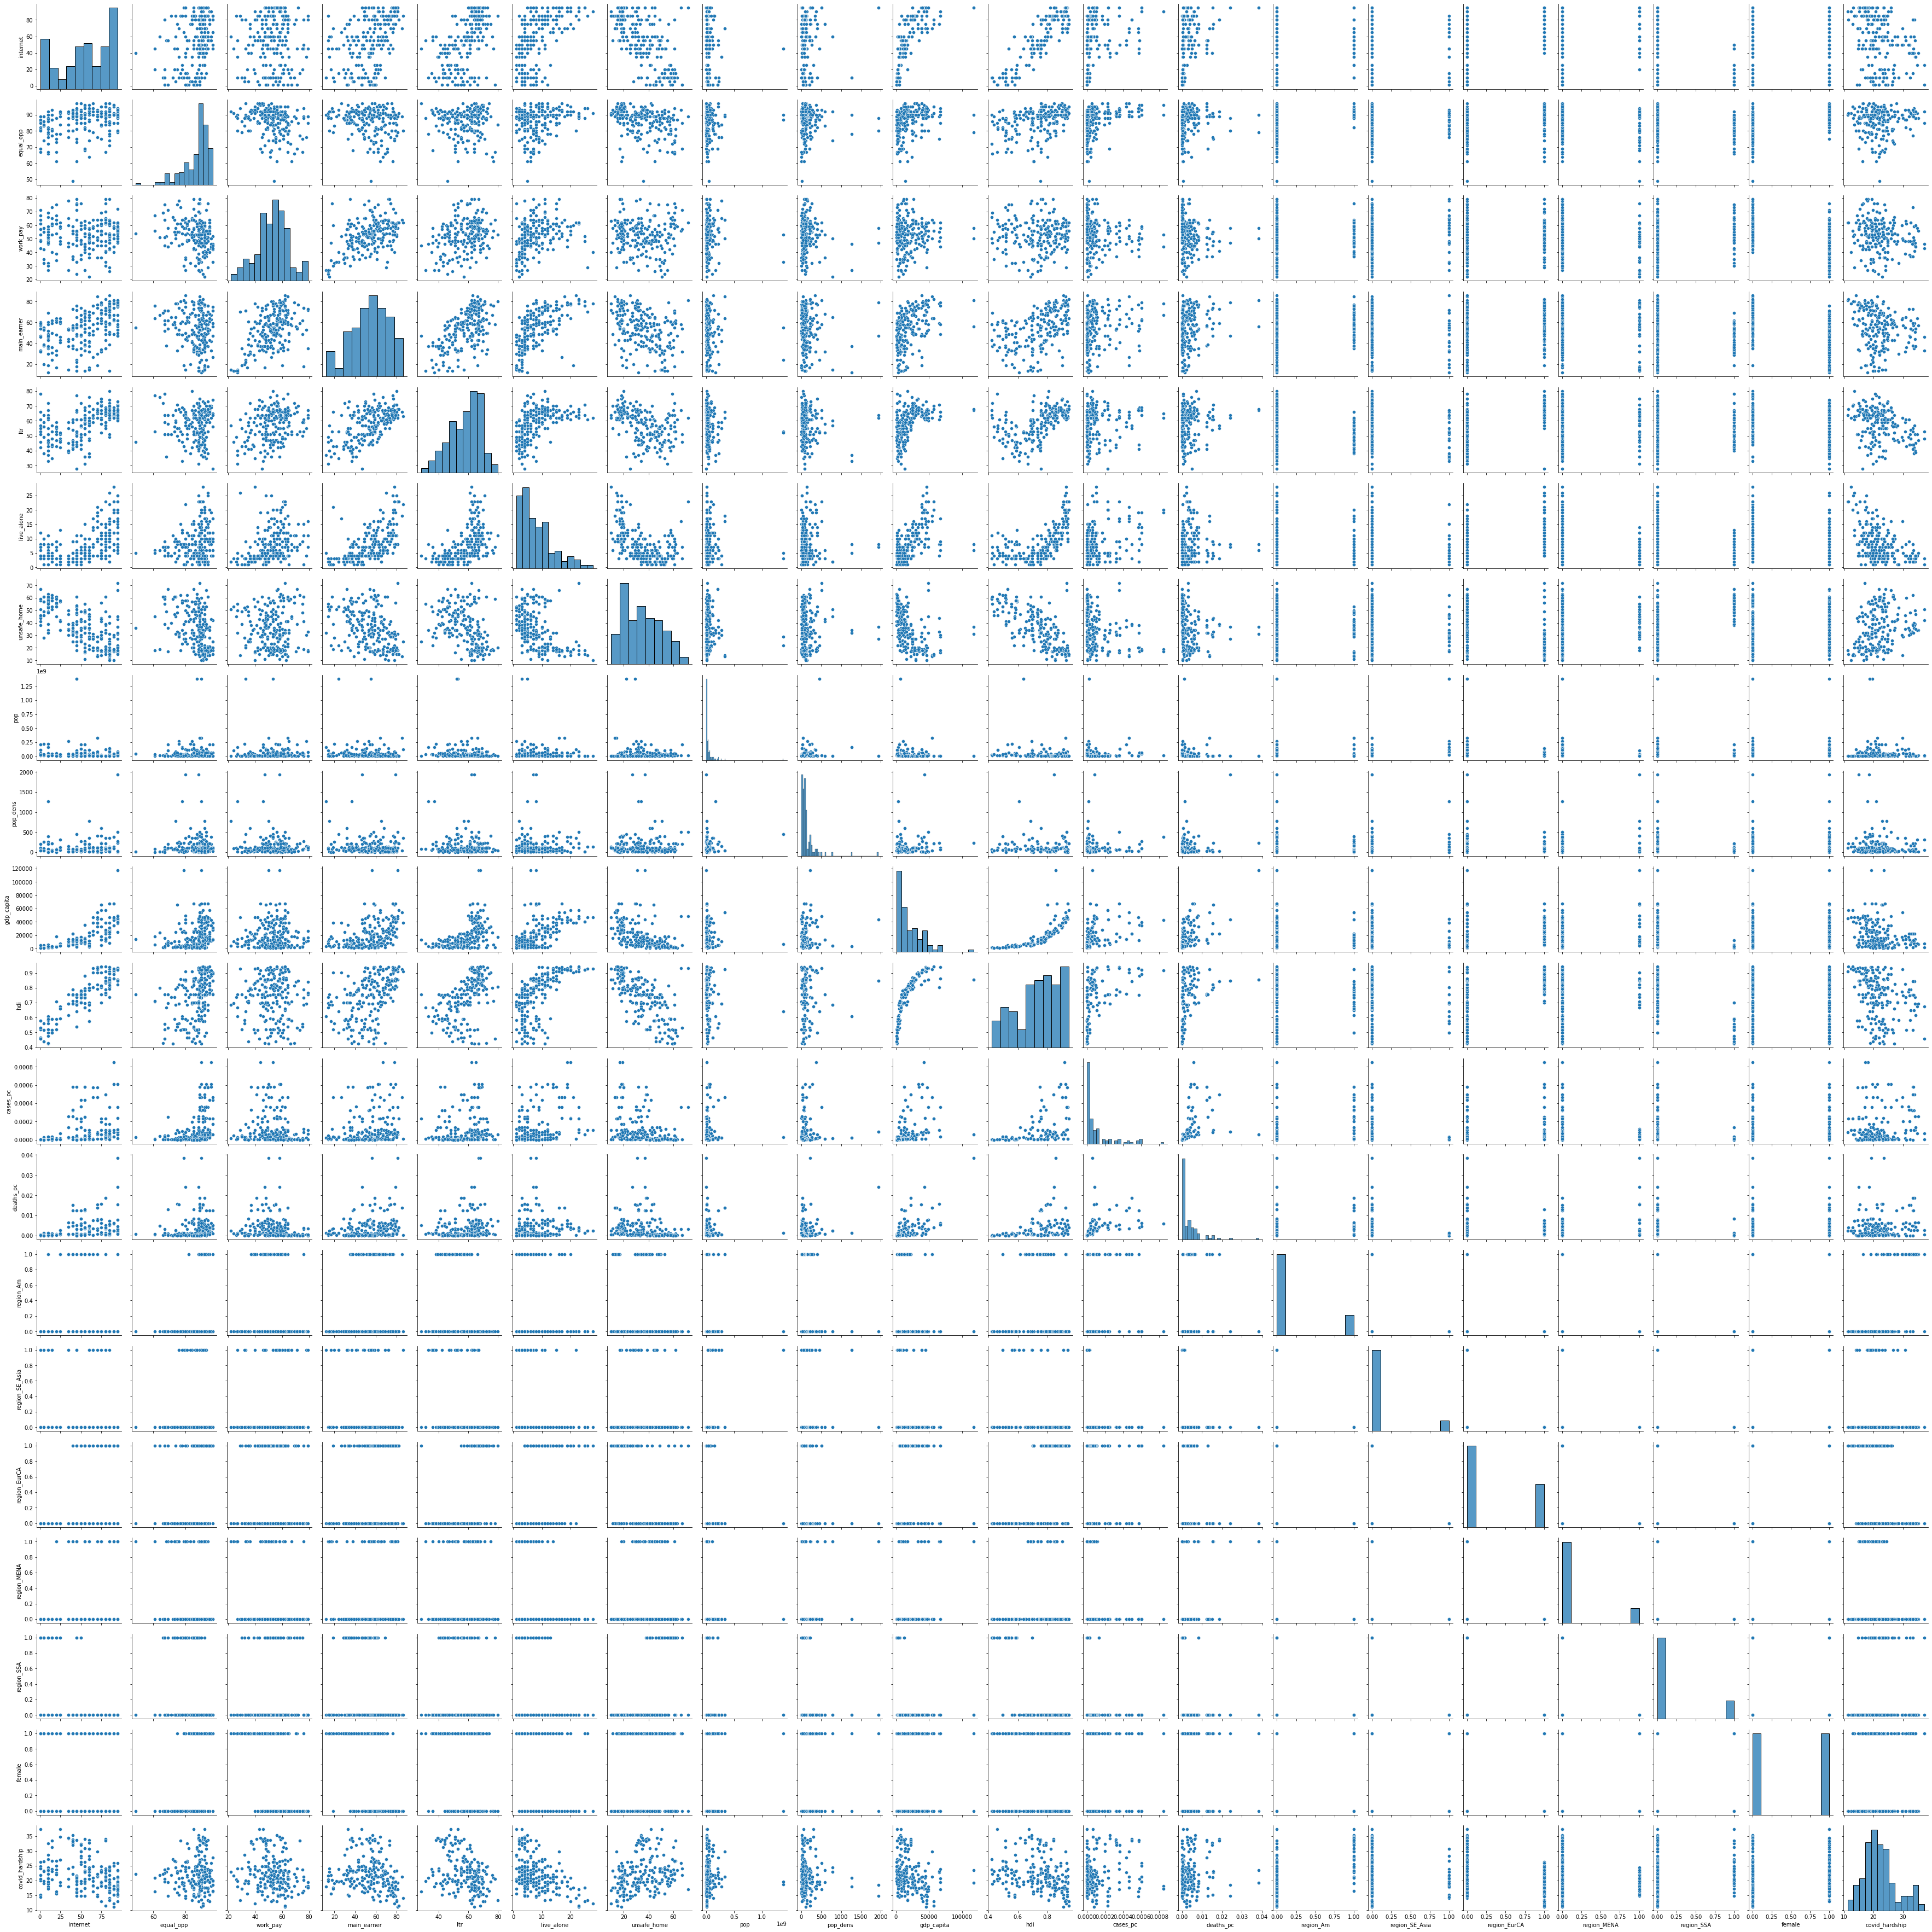

In [972]:
sns.pairplot(countries)

In [1018]:
countries = countries.reset_index()

I was able to remove 'work_pay', 'region_SE_Asia', and 'region_EurCA' as features in a previous iteration, which were zeroed out using LassoCV.

In [1029]:
X, y = countries.drop(['covid_hardship', 'index', 'work_pay', 'region_SE_Asia', 'region_EurCA'], axis=1), countries['covid_hardship']

In [1030]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

## Linear

In [1031]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [1032]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.4957993782594209

In [1033]:
lr.score(X_val,y_val)

0.45093648591220414

## RidgeCV

In [1034]:
lm_ridge = RidgeCV()
lm_ridge.fit(X_train_scaled, y_train)
lm_ridge.score(X_train_scaled, y_train)

0.48396434756110374

In [1035]:
lm_ridge.score(X_val_scaled, y_val)

0.4888725783068931

## LassoCV

In [1036]:
lm_lasso = LassoCV(cv=8)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.49314558996714364

In [1037]:
lm_lasso.score(X_val_scaled, y_val)

0.48477883204910255

In [1038]:
list(zip(X_train.columns, lm_lasso.coef_))

[('internet', 2.007337051300916),
 ('equal_opp', -0.4982969185181144),
 ('main_earner', -0.07072502376253402),
 ('ltr', -0.20564464869183677),
 ('live_alone', -1.7218267481844858),
 ('unsafe_home', 0.9460926783392322),
 ('pop', -0.15453957095531634),
 ('pop_dens', -0.011290198493755713),
 ('gdp_capita', -0.4002820540569743),
 ('hdi', -0.7050667376290715),
 ('cases_pc', 0.990849201549714),
 ('deaths_pc', -0.5655517088564948),
 ('region_Am', 2.5471981783984567),
 ('region_MENA', -0.4318261901395627),
 ('region_SSA', 0.8791103922754098),
 ('female', 0.6311156208469842)]

## Check Model on All Data

In [1047]:
countries_final = countries.drop(['work_pay', 'index', 'region_SE_Asia', 'region_EurCA'], axis=1)

In [1087]:
X, y = countries_final.drop(['covid_hardship'], axis=1), countries_final['covid_hardship']

In [1088]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [1089]:
lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.537299012735433

In [1090]:
lr.score(X_test, y_test)

0.634316460325931

## Residuals

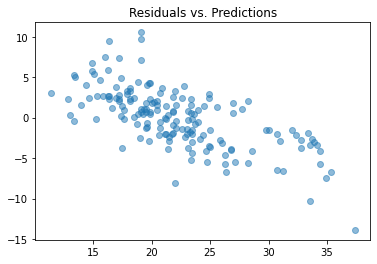

In [1052]:
fig, ax = plt.subplots()
ax.scatter(y, residuals, alpha = .5)

ax.set_title("Residuals vs. Predictions");

In [1062]:
X = countries_final.drop(['covid_hardship'], axis=1)
y = countries_final['covid_hardship']

/Users/mattranalletta/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mattranalletta/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


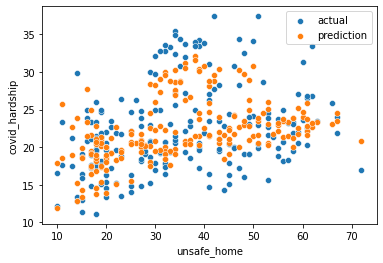

In [1068]:
sns.scatterplot(countries_final.unsafe_home, y, label='actual')
sns.scatterplot(countries_final.unsafe_home, lr.predict(countries_final.drop(['covid_hardship'], axis=1)), label='prediction');

/Users/mattranalletta/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mattranalletta/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='live_alone', ylabel='covid_hardship'>

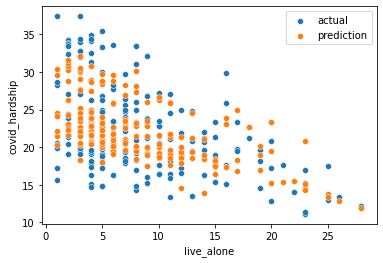

In [1069]:
sns.scatterplot(countries_final.live_alone, y, label='actual')
sns.scatterplot(countries_final.live_alone, lr.predict(countries_final.drop(['covid_hardship'], axis=1)), label='prediction')

/Users/mattranalletta/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mattranalletta/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ltr', ylabel='covid_hardship'>

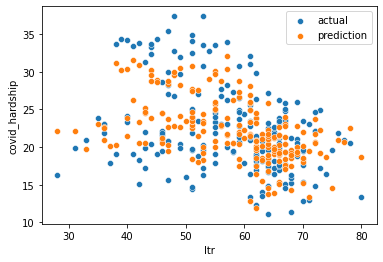

In [1072]:
sns.scatterplot(countries_final.ltr, y, label='actual')
sns.scatterplot(countries_final.ltr, lr.predict(countries_final.drop(['covid_hardship'], axis=1)), label='prediction')

## R^2 and RMSE

In [1078]:
sm.add_constant(X).head()

,const,internet,equal_opp,main_earner,ltr,live_alone,unsafe_home,pop,pop_dens,gdp_capita,hdi,cases_pc,deaths_pc,region_Am,region_MENA,region_SSA,female
0,1.0,95.0,93,67,61,17,17,37742157.0,4.037,44017.591,0.926,0.000238,0.003134,1,0,0,1
1,1.0,95.0,92,77,61,20,16,37742157.0,4.037,44017.591,0.926,0.000238,0.003134,1,0,0,0
2,1.0,70.0,90,64,62,16,14,331002647.0,35.608,54225.446,0.924,0.000466,0.013751,1,0,0,1
3,1.0,70.0,89,85,66,18,13,331002647.0,35.608,54225.446,0.924,0.000466,0.013751,1,0,0,0
4,1.0,60.0,93,55,59,4,35,45195777.0,16.177,18933.907,0.825,0.000078,0.004233,1,0,0,1


In [1079]:
#Create the model
model = sm.OLS(y, sm.add_constant(X))

#Fit
fit = model.fit()

#Print out summary
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         covid_hardship   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     16.20
Date:                Thu, 03 Dec 2020   Prob (F-statistic):           1.16e-27
Time:                        21:43:36   Log-Likelihood:                -565.00
No. Observations:                 208   AIC:                             1164.
Df Residuals:                     191   BIC:                             1221.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          24.5334      6.036      4.064      0.000      12.627      36.440
internet        0.0259      0.022      1.199      0.232      -0.017       0.069
equal_opp      -0.0474      0.048     -0.978      0.329      -0.143       0.048
main_earner    -0.0066      0.030     -0.220      0.826      -0.066       0.052
ltr            -0.0119      0.039     -0.308      0.758      -0.088       0.064
live_alone     -0.4158      0.087     -4.799      0.000      -0.587      -0.245
unsafe_home     0.0759      0.029      2.641      0.009       0.019       0.133
pop         -1.869e-09   1.95e-09     -0.959      0.339   -5.71e-09    1.98e-09
pop_dens       -0.0001      0.001     -0.103      0.918      -0.003       0.002
gdp_capita   1.382e-05   3.18e-05      0.435      0.664   -4.88e-05    7.65e-05
hdi             0.1263      6.170      0.020      0.984     -12.043      12.295
cases_pc     5547.0837   2103.447      2.637      0.009    1398.115    9696.052
deaths_pc     -12.4714     81.004     -0.154      0.878    -172.248     147.306
region_Am       7.2222      0.946      7.638      0.000       5.357       9.087
region_MENA    -2.7153      1.100     -2.468      0.014      -4.885      -0.545
region_SSA      1.2278      1.253      0.980      0.329      -1.245       3.700
female         -0.0135      0.829     -0.016      0.987      -1.649       1.622
==============================================================================
Omnibus:                        5.563   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                7.584
Skew:                           0.123   Prob(JB):                       0.0225
Kurtosis:                       3.903   Cond. No.                     1.21e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [1091]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [1092]:
X, y = countries_final.drop(['covid_hardship'], axis=1), countries_final['covid_hardship']

In [1093]:
y_pred = lr.predict(X)

In [1095]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

3.716099600343097

In [ ]:
How to plot RMSE?

######

## Examining Outliers

In [889]:
X, y = countries.drop(['covid_hardship', 'work_pay', 'region_SE_Asia', 'region_EurCA'], axis=1), countries['covid_hardship']

In [890]:
preds = lm_ridge.predict(X)
residuals = preds - y

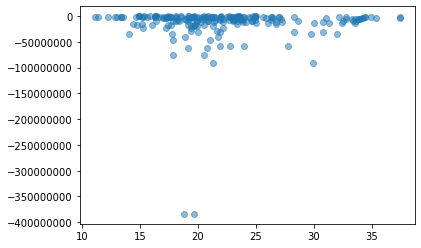

In [893]:
fig, ax = plt.subplots()
ax.scatter(y, residuals, alpha = .5)
ax.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [894]:
countries.covid_hardship.sort_values(ascending=True)

115    11.125
179    11.375
131    12.250
178    12.875
133    13.000
        ...  
27     34.375
21     34.875
7      35.375
200    37.375
20     37.375
Name: covid_hardship, Length: 208, dtype: float64

In [895]:
residuals.sort_values(ascending = False)

80    -4.740963e+05
81    -4.741004e+05
153   -5.251784e+05
152   -5.251840e+05
173   -5.789407e+05
           ...     
49    -7.607766e+07
3     -9.206583e+07
2     -9.206584e+07
73    -3.838323e+08
72    -3.838323e+08
Name: covid_hardship, Length: 208, dtype: float64

In [818]:
#countries = countries.drop([72, 73])

In [819]:
#X, y = countries.drop(['covid_hardship', 'work_pay', 'region_SE_Asia', 'region_EurCA'], axis=1), countries['covid_hardship']

In [820]:
#preds = lm_ridge.predict(X)
#residuals = preds - y

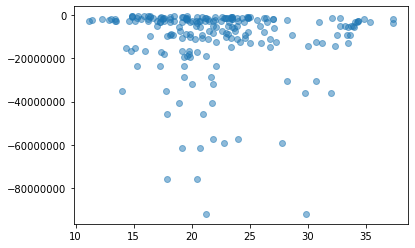

In [821]:
#fig, ax = plt.subplots()
#ax.scatter(y, residuals, alpha = .5)
#ax.ticklabel_format(useOffset=False, style='plain')
#plt.show()

## After removing outliers:

In [831]:
X, y = countries.drop(['covid_hardship'], axis=1), countries['covid_hardship']

In [832]:
X, X_test, y, y_test = train_test_split(X, y, test_size=.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=3)

#### Linear

In [833]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [834]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

0.5452841471673113

In [835]:
lr.score(X_val,y_val)

0.10145451389497706

#### RidgeCV

In [836]:
lm_ridge = RidgeCV()
lm_ridge.fit(X_train_scaled, y_train)
lm_ridge.score(X_train_scaled, y_train)

0.5371501516143637

In [837]:
lm_ridge.score(X_val_scaled, y_val)

0.17571400210728494

#### LassoCV

In [838]:
lm_lasso = LassoCV(cv=8)
lm_lasso.fit(X_train_scaled, y_train)
lm_lasso.score(X_train_scaled, y_train)

0.502679149859816

In [839]:
lm_lasso.score(X_val_scaled, y_val)

0.3411934082778507

Not good! Keeping the outliers in was better.